## **Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Reading The Data**

In [4]:
df = pd.read_csv('fifa.csv')

In [5]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


## **EDA** 

### **1. Missing values**

From the above dataset only about 1% of data is missing from **Club**, **Value**, **Contract Valid Untill** columns and only 0.2% of data is missing from **International Reputation** and **Skill Moves columns**. Which are very negligible compared to size of dataset.

In [45]:
df.shape

(18207, 18)

In [46]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

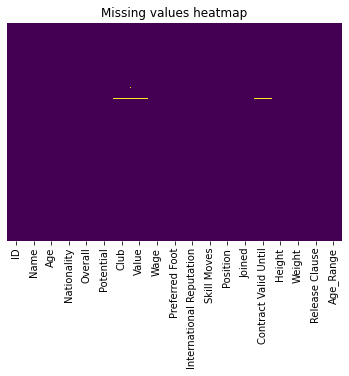

In [18]:
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, cmap = 'viridis').set_title("Missing values heatmap")

### **2. Age**

The description of Age column of dataset tells us that the youngest player is 16 years old while the oldest player is  45 yesrs old. The avarage of age of all players are just above 25 years old.

The graph shows that most of the players are in the range of 20-25 years old.

In [9]:
pd.DataFrame(df.Age.describe())

,Age
count,18207.000000
mean,25.122206
std,4.669943
min,16.000000
25%,21.000000
50%,25.000000
75%,28.000000
max,45.000000


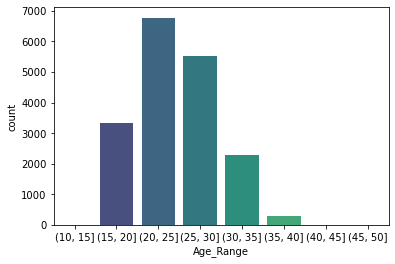

In [24]:
df['Age_Range'] = pd.cut(df.Age, [10, 15, 20, 25, 30, 35, 40, 45, 50])
sns.countplot(x = "Age_Range", data = df, palette = 'viridis')
plt.show()

### **3. Nationality**

The description of Nationality column of dataset tells us that there are total **164 numbers of unique country** as players nationality.

From the graph and description we can see that England has the maximum numbers of players. The number of players from **england** nationality is **1662**. And **second and third** country w.r.t. number of players are **Germany and Spain** respectively.

In [26]:
pd.DataFrame(df.Nationality.describe())

,Nationality
count,18207
unique,164
top,England
freq,1662


In [15]:
#making nations dataset to know about the nationality of players.
nations = pd.DataFrame(df["Nationality"].value_counts().rename_axis('Nations').to_frame('counts'))
nations.reset_index(level=0, inplace=True)
nations

,Nations,counts
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914
...,...,...
159,São Tomé & Príncipe,1
160,Liberia,1
161,Botswana,1
162,United Arab Emirates,1


In [17]:
# separating top 10 from nations dataset to make graph plotting easier.
top10 = nations.iloc[0:11]
top10

,Nations,counts
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914
5,Brazil,827
6,Italy,702
7,Colombia,618
8,Japan,478
9,Netherlands,453


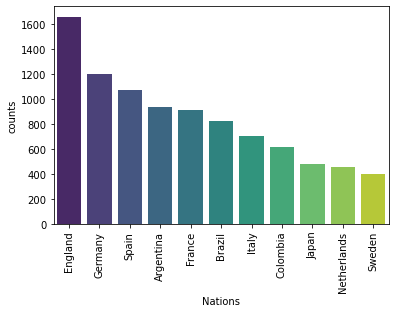

In [25]:
sns.barplot(x = "Nations", y = 'counts', data = top10, palette = 'viridis')
plt.xticks(rotation=90)
plt.show()

### **4. Club**

From the below dataframe ,description and graph we can derive that there are **651 unique clubs** in the dataset.

And there are **26 clubs contains highest number of players in there club i.e 33.**

In [28]:
pd.DataFrame(df.Club.describe())

,Club
count,17966
unique,651
top,Cardiff City
freq,33


In [29]:
#making clubs dataset to know about the nationality of players.
clubs = pd.DataFrame(df["Club"].value_counts().rename_axis('Clubs').to_frame('counts'))
clubs.reset_index(level=0, inplace=True)
clubs

,Clubs,counts
0,Cardiff City,33
1,Fortuna Düsseldorf,33
2,Valencia CF,33
3,RC Celta,33
4,Empoli,33
...,...,...
646,Atlético Mineiro,20
647,Internacional,20
648,Sligo Rovers,19
649,Limerick FC,19


In [47]:
ct = pd.DataFrame(clubs["counts"].value_counts().rename_axis('number').to_frame('counts'))
ct.reset_index(level=0, inplace=True)
d = ct.sort_values('number', ascending=False)
d

,number,counts
6,33,26
9,32,15
11,31,5
1,30,107
5,29,40
0,28,193
2,27,96
3,26,55
4,25,50
7,24,25


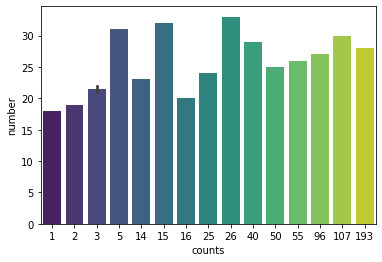

In [60]:
sns.barplot(x = "counts", y = 'number', data = d, palette = 'viridis')
plt.show()

### **5. Height**

From the description of Height column of dataset we get to know that the avarage height of all players is around **6 ft**, which indicates that mostly players have a very good height.

**T. Holý** and **D. Hodzic** are taller from all players with a height of **6.75 ft**. And **N. Barrios**, **H. Nakagawa** and **K. Yamaguchi** are the shortest players from all players with a height of **5.08 ft**.

From the below graph we can conclude that the club **AC Horsens** has the maximum average players height while **Audax Italiano** has the minimum average players height i.e. **6.12 ft** and **5.72 ft** respectively.

Also the country **South Sudan** has the maximum average players height while **Indonesia** has the minimum average players height i.e. **6.58 ft** and **5.42 ft** respectively.

In [48]:
pd.DataFrame(df.Height.describe())

,Height
count,18207.000000
mean,5.946771
std,0.220514
min,5.083333
25%,5.750000
50%,5.916667
75%,6.083333
max,6.750000


In [57]:
pd.DataFrame(df[df["Height"] == df['Height'].max()])

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Age_Range
11614,199321,T. Holý,26,Czech Republic,64,68,Gillingham,400.0,2.0,Right,1.0,1.0,GK,2017,2019-01-01,6.75,225.0,730.0,"(25, 30]"
17927,243796,D. Hodzic,22,Croatia,51,61,Vejle Boldklub,50.0,1.0,Right,1.0,1.0,GK,2017,2018-01-01,6.75,176.0,73.0,"(20, 25]"


In [58]:
pd.DataFrame(df[df["Height"] == df['Height'].min()])

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Age_Range
6275,237994,N. Barrios,20,Argentina,69,82,San Lorenzo de Almagro,2000.0,7.0,Right,1.0,3.0,LM,2017,2022-01-01,5.083333,128.0,4300.0,"(15, 20]"
6584,232951,H. Nakagawa,23,Japan,69,72,Kashiwa Reysol,1300.0,5.0,Right,1.0,3.0,CAM,2013,2021-01-01,5.083333,126.0,1800.0,"(20, 25]"
17157,242566,K. Yamaguchi,23,Japan,55,61,Shonan Bellmare,120.0,1.0,Right,1.0,3.0,CF,2018,2021-01-01,5.083333,110.0,174.0,"(20, 25]"


In [107]:
t = pd.DataFrame(df.groupby('Club')['Height'].mean().rename_axis('Club').to_frame('Avg.height'))
t.reset_index(level=0, inplace=True)
t = t.sort_values('Avg.height', ascending=False)
t

,Club,Avg.height
9,AC Horsens,6.120000
505,SPAL,6.086420
301,Holstein Kiel,6.083333
0,SSV Jahn Regensburg,6.080460
229,FC Midtjylland,6.074074
...,...,...
157,Colo-Colo,5.758929
366,Lobos BUAP,5.756173
33,Al Hazem,5.755556
597,Universidad Católica,5.744048


In [108]:
x = t.iloc[[0,-1]]
x

,Club,Avg.height
9,AC Horsens,6.120000
66,Audax Italiano,5.720238


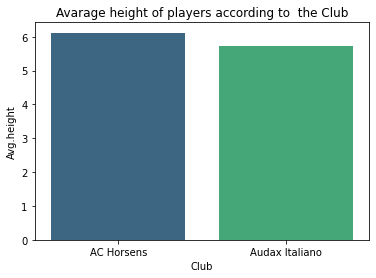

In [109]:
sns.barplot(x = "Club", y = 'Avg.height', data = x, palette = 'viridis')
plt.title('Avarage height of players according to  the Club')
plt.show()

In [99]:
q = pd.DataFrame(df.groupby('Nationality')['Height'].mean().rename_axis('Nations').to_frame('Avg.height'))
q.reset_index(level=0, inplace=True)
q = q.sort_values('Avg.height', ascending=False)
q

,Nations,Avg.height
138,South Sudan,6.583333
88,Kuwait,6.416667
116,Oman,6.333333
89,Latvia,6.250000
64,Guatemala,6.166667
...,...,...
16,Bermuda,5.666667
149,Thailand,5.600000
53,Fiji,5.583333
98,Malta,5.500000


In [100]:
x = q.iloc[[0,-1]]
x

,Nations,Avg.height
138,South Sudan,6.583333
74,Indonesia,5.416667


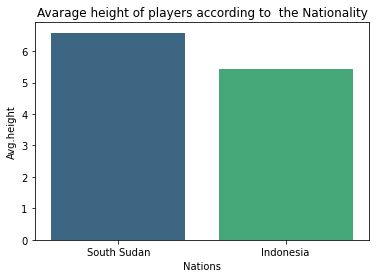

In [105]:
sns.barplot(x = "Nations", y = 'Avg.height', data = x, palette = 'viridis')
plt.title('Avarage height of players according to  the Nationality')
plt.show()

### **6. Weight**

From the description of Weight column of dataset we get to know that the avarage height of all players is around **166 pounds**.

**A. Akinfenwa** has the highest weight from all players with a weight of **243 pounds**. And **B. Al Mutairi**, **K. Yamaguchi** have the lowest weight from all players with a height of **110 pounds**.

From the below graph we can conclude that the club **SV Wehen Wiesbaden** has the maximum average players weight while **Al Wehda** has the minimum average players weight i.e. **178 pounds** and **149 pounds** respectively.

Also the nation **Oman** has the maximum average players weight while **United Arab Emirates** has the minimum average players weight i.e. **205 pounds** and **132 pounds** respectively.

In [86]:
pd.DataFrame(df.Weight.describe())

,Weight
count,18207.000000
mean,165.979129
std,15.572775
min,110.000000
25%,154.000000
50%,165.000000
75%,176.000000
max,243.000000


In [87]:
pd.DataFrame(df[df["Weight"] == df['Weight'].max()])

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Age_Range
9501,156321,A. Akinfenwa,36,England,66,66,Wycombe Wanderers,230.0,2.0,Right,1.0,2.0,LS,2016,2019-01-01,5.833333,243.0,403.0,"(35, 40]"


In [88]:
pd.DataFrame(df[df["Weight"] == df['Weight'].min()])

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Age_Range
13338,235600,B. Al Mutairi,28,Saudi Arabia,62,62,Al Batin,240.0,3.0,Left,1.0,2.0,LB,2011,2021-01-01,5.500000,110.0,396.0,"(25, 30]"
17157,242566,K. Yamaguchi,23,Japan,55,61,Shonan Bellmare,120.0,1.0,Right,1.0,3.0,CF,2018,2021-01-01,5.083333,110.0,174.0,"(20, 25]"


In [111]:
z = pd.DataFrame(df.groupby('Club')['Weight'].mean().rename_axis('Club').to_frame('Avg.Weight'))
z.reset_index(level=0, inplace=True)
z = z.sort_values('Avg.Weight', ascending=False)
z

,Club,Avg.Weight
510,SV Wehen Wiesbaden,178.083333
573,SønderjyskE,177.962963
72,Bayer 04 Leverkusen,177.730769
9,AC Horsens,177.480000
211,FC Augsburg,176.935484
...,...,...
188,Derry City,156.055556
265,Gamba Osaka,155.066667
389,Monterrey,153.076923
40,Al Taawoun,151.275862


In [115]:
# Took only highest and lowest term of data to avoid clusting of graph element and simple under standing

x = z.iloc[[0,-1]]
x

,Club,Avg.Weight
510,SV Wehen Wiesbaden,178.083333
41,Al Wehda,149.432638


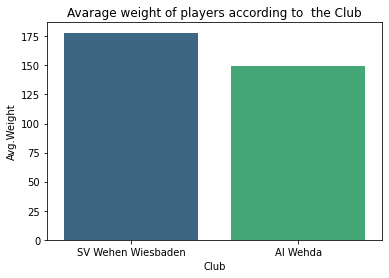

In [118]:
sns.barplot(x = "Club", y = 'Avg.Weight', data = x, palette = 'viridis')
plt.title('Avarage weight of players according to  the Club')
plt.show()

In [135]:
r = pd.DataFrame(df.groupby('Nationality')['Weight'].mean().rename_axis('Nations').to_frame('Avg.Weight'))
r.reset_index(level=0, inplace=True)
r = r.sort_values('Avg.Weight', ascending=False)
r

,Nations,Avg.Weight
116,Oman,205.000000
100,Mauritius,194.000000
62,Grenada,194.000000
109,New Caledonia,192.000000
89,Latvia,191.833333
...,...,...
149,Thailand,142.800000
74,Indonesia,141.000000
19,Botswana,139.000000
50,Ethiopia,137.000000


In [136]:
x = r.iloc[[0,-1]]
x

,Nations,Avg.Weight
116,Oman,205.0
156,United Arab Emirates,132.0


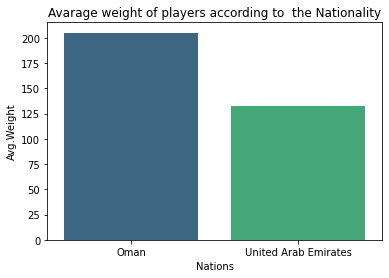

In [137]:
sns.barplot(x = "Nations", y = 'Avg.Weight', data = x, palette = 'viridis')
plt.title('Avarage weight of players according to  the Nationality')
plt.show()

### **7. Potential**

From the description of Potential column of dataset we get to know that the avarage potential of all players is around **71**.

**K. Mbappé** has the highest potential from all players with a potential score of **95**. And **Y. Uchimura**, **K. Pilkington** have the lowest potential from all players with a potential score of **48**.

From the below graph we can conclude that the club **Juventus** has the maximum average players potential score while **Limerick FC** has the minimum average players potential score around i.e. **86** and **61** respectively.

Also the nation **Dominican Republic** has the maximum average players potential score while **Belize** has the minimum average players potential score i.e. **80.5** and **61** respectively. So the **Dominican Republic** players are best choice for a team as their avarage potential is higher.

In [93]:
pd.DataFrame(df.Potential.describe())

,Potential
count,18207.000000
mean,71.307299
std,6.136496
min,48.000000
25%,67.000000
50%,71.000000
75%,75.000000
max,95.000000


In [94]:
pd.DataFrame(df[df["Potential"] == df['Potential'].max()])

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Age_Range
25,231747,K. Mbappé,19,France,88,95,Paris Saint-Germain,81000.0,100.0,Right,3.0,5.0,RM,2018,2022-01-01,5.833333,161.0,166100.0,"(15, 20]"


In [95]:
pd.DataFrame(df[df["Potential"] == df['Potential'].min()])

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Age_Range
18171,237746,Y. Uchimura,33,Japan,48,48,Hokkaido Consadole Sapporo,20.0,1.0,Right,1.0,2.0,CAM,2010,2021-01-01,5.750000,148.0,25.000000,"(30, 35]"
18183,53748,K. Pilkington,44,England,48,48,Cambridge United,NaN,1.0,Right,1.0,1.0,GK,2018,2023-01-01,6.166667,190.0,4585.060806,"(40, 45]"


In [131]:
y = pd.DataFrame(df.groupby('Club')['Potential'].mean().rename_axis('Club').to_frame('Avg.Potential'))
y.reset_index(level=0, inplace=True)
y = y.sort_values('Avg.Potential', ascending=False)
y

,Club,Avg.Potential
326,Juventus,85.520000
212,FC Barcelona,85.303030
470,Real Madrid,84.636364
374,Manchester City,83.909091
214,FC Bayern München,83.655172
...,...,...
558,St. Patrick's Athletic,63.000000
578,Tianjin TEDA FC,62.857143
92,Bray Wanderers,62.608696
392,Morecambe,62.178571


In [132]:
x = y.iloc[[0,-1]]
x

,Club,Avg.Potential
326,Juventus,85.520000
361,Limerick FC,61.263158


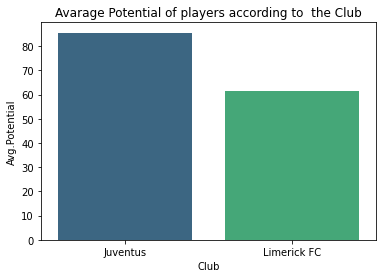

In [133]:
sns.barplot(x = "Club", y = 'Avg.Potential', data = x, palette = 'viridis')
plt.title('Avarage Potential of players according to  the Club')
plt.show()

In [127]:
p = pd.DataFrame(df.groupby('Nationality')['Potential'].mean().rename_axis('Nations').to_frame('Avg.Potential'))
p.reset_index(level=0, inplace=True)
p = p.sort_values('Avg.Potential', ascending=False)
p

,Nations,Avg.Potential
42,Dominican Republic,80.500000
156,United Arab Emirates,78.000000
28,Chad,78.000000
27,Central African Rep.,76.000000
128,Russia,75.341772
...,...,...
140,St Kitts Nevis,63.333333
138,South Sudan,63.000000
124,Puerto Rico,63.000000
98,Malta,63.000000


In [128]:
x = p.iloc[[0,-1]]
x

,Nations,Avg.Potential
42,Dominican Republic,80.5
14,Belize,61.0


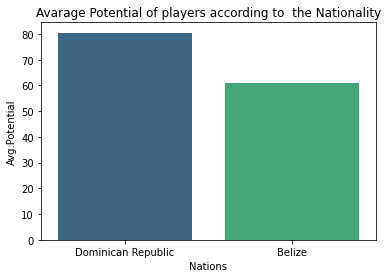

In [129]:
sns.barplot(x = "Nations", y = 'Avg.Potential', data = x, palette = 'viridis')
plt.title('Avarage Potential of players according to  the Nationality')
plt.show()